## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

import numpy as np
# Study data files

mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"


# Read the mouse data and the study results
 
Mousedataframe=pd.read_csv(mouse_metadata_path)
  
Studyresultsdataframe= pd.read_csv(study_results_path)
              

In [2]:
Mousedataframe.head() 

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
Studyresultsdataframe.head() 

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
# Combine the data into a single dataset
# Display the data table for preview
Combine_df = pd.merge(Mousedataframe, Studyresultsdataframe, on="Mouse ID")
Combine_df.head(15)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [5]:
# Checking the number of mice.
len(Combine_df)




1893

In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
Combine_df[Combine_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)].head(40)





,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
# Optional: Get all the data for the duplicate mouse ID. 



In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
Combine_df.drop_duplicates(subset=['Mouse ID','Timepoint'], keep=False, inplace=True)



In [9]:
# Checking the number of mice in the clean DataFrame.
#len(Combine_df)
print(Combine_df["Mouse ID"].value_counts())

a203    10
a818    10
z578    10
e662    10
q787    10
        ..
n482     1
x336     1
l872     1
h428     1
o848     1
Name: Mouse ID, Length: 249, dtype: int64


## Summary Statistics

In [31]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and 
#SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

#drugr_group =Combine_df.groupby(["Drug Regimen"])

mean=Combine_df.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']

#print (mean)
#mean.head()
median=Combine_df.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
#print (median)
standarddeviation=Combine_df.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
#print(standarddeviation)
varience=Combine_df.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
#print(varience)
SEM=Combine_df.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']
#print(SEM)
Statistics_summary = pd.DataFrame({"mean":mean, "median":median, "standarddeviation":standarddeviation,"varience":varience,
                                   "SEM":SEM 
                                    
                                      })
Statistics_summary.head()

,mean,median,standarddeviation,varience,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,4.994774,24.947764,0.329346
Ceftamin,52.591172,51.776157,6.268188,39.290177,0.469821
Infubinol,52.884795,51.820584,6.567243,43.128684,0.492236
Ketapril,55.235638,53.698743,8.279709,68.553577,0.603860
Naftisol,54.331565,52.509285,8.134708,66.173479,0.596466


In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and 
#SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
drugregimen_group = Combine_df.groupby(["Drug Regimen"])
drugregimen_group.head(20)
statistics=drugregimen_group.agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]
statistics

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.458254,50.854632,44.053659,6.637293,0.540135
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<IPython.core.display.Javascript object>


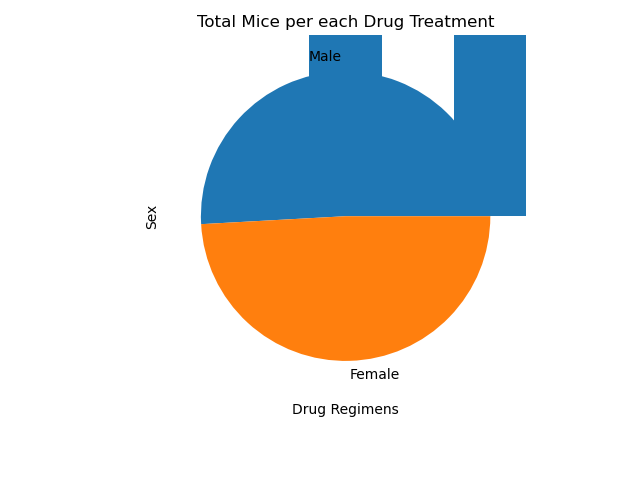

In [39]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
#mice_unique=Combine_df("Mouse ID").unique()
%matplotlib notebook

mouse_count=Combine_df["Drug Regimen"].value_counts()
y_axis=mouse_count.values
x_axis=mouse_count.index
mouse_count.plot(kind="bar", facecolor='blue',)
plt.ylabel("Total Count")
plt.xlabel("Drug Regimens")
plt.title("Total Mice per each Drug Treatment")
plt.xticks(rotation=20)
plt.show()
plt.tight_layout()



In [40]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
import matplotlib.pyplot as plt
counts = Combine_df['Drug Regimen'].value_counts()
counts.plot(kind="bar");



In [41]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
counts=Combine_df['Sex'].value_counts()
counts.plot(kind="pie")

plt.show()


<IPython.core.display.Javascript object>


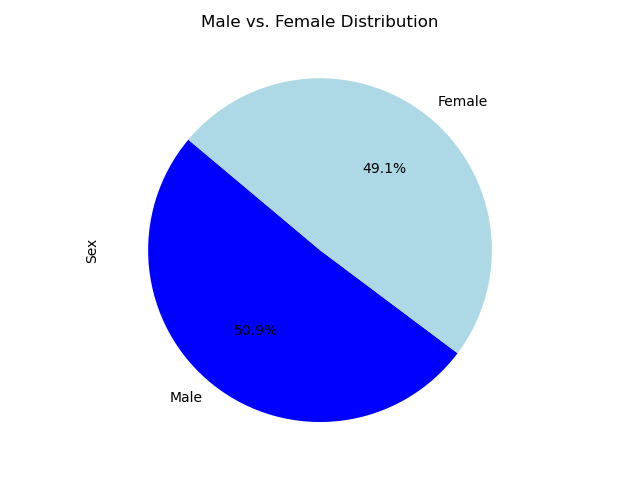

In [35]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

%matplotlib notebook

gender_groups=Combine_df["Sex"].value_counts()
labels=gender_groups.values
sizes=gender_groups.values
gender_groups.plot(kind="pie", colors=["blue", "lightblue"], autopct="%1.1f%%", shadow=False, startangle=140)
plt.title("Male vs. Female Distribution")
plt.ylabel("Sex")

plt.show()
plt.tight_layout()



## Quartiles, Outliers and Boxplots

Calculate the final tumor volume of each mouse across four of the treatment regimens:  
Capomulin, Ramicane, Infubinol, and Ceftamin




In [16]:
# Start by getting the last (greatest) timepoint for each mouse
#capomulin_df=capomulin_df
Mosttimepoint = Combine_df.groupby(['Mouse ID']).max()['Timepoint']
greatest_df= pd.DataFrame(Mosttimepoint)
greatest_df.head(10)

,Timepoint
Mouse ID,
a203,45
a251,45
a262,45
a275,45
a366,30
a401,45
a411,45
a444,45
a457,10


In [17]:

merged_df = pd.merge(greatest_df,Combine_df, on=("Mouse ID","Timepoint"), how="left" )
merged_df


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [18]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
capomulin= merged_df.loc[merged_df['Drug Regimen'] == 'Capomulin']['Tumor Volume (mm3)']
ramicane= merged_df.loc[merged_df['Drug Regimen'] == 'Ramicane']['Tumor Volume (mm3)']
infubinol=merged_df.loc[merged_df['Drug Regimen'] == 'Infubinol']['Tumor Volume (mm3)']
ceftamin= merged_df.loc[merged_df['Drug Regimen'] == 'Ceftamin']['Tumor Volume (mm3)']

In [36]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes
 # add subset 
 # Determine outliers using upper and lower bounds
 #Capomulin
quartile_cap= capomulin.quantile([.25,.5,.75])
lower_cap= quartile_cap[.25]
upper_cap=quartile_cap[.75]
iqr_cap= upper_cap-lower_cap
lowout_cap= lower_cap-(1.5*iqr_cap)
upout_cap= upper_cap+(1.5*iqr_cap)

#Ramicane
quartile_ram= ramicane.quantile([.25,.5,.75])
lower_ram= quartile_ram[.25]
upper_ram=quartile_ram[.75]
iqr_ram= upper_ram-lower_ram
lowout_ram= lower_ram-(1.5*iqr_ram)
upout_ram= upper_ram+(1.5*iqr_ram)

#Infubinol
quartile_inbol= infubinol.quantile([.25,.5,.75])
lower_inbol= quartile_inbol[.25]
upper_inbol=quartile_inbol[.75]
iqr_inbol= upper_inbol-lower_inbol
lowout_inbol= lower_inbol-(1.5*iqr_inbol)
upout_inbol= upper_inbol+(1.5*iqr_inbol)

#Ceftamin
quartile_ceft= ceftamin.quantile([.25,.5,.75])
lower_ceft= quartile_ceft[.25]
upper_ceft=quartile_ceft[.75]
iqr_ceft= upper_ceft-lower_ceft
lowout_ceft= lower_ceft-(1.5*iqr_ceft)
upout_ceft= upper_ceft+(1.5*iqr_ceft)   

<IPython.core.display.Javascript object>


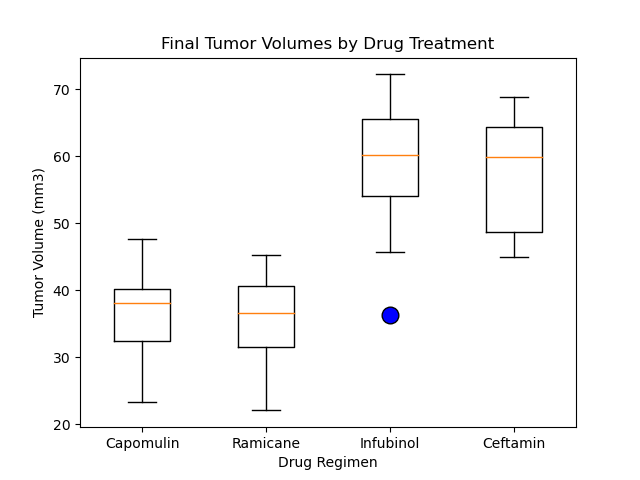

In [37]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
%matplotlib notebook
boxedplot = dict(markerfacecolor='blue',markersize=12)
plt.boxplot([capomulin,ramicane, infubinol, ceftamin], labels=["Capomulin","Ramicane","Infubinol","Ceftamin"], flierprops= boxedplot)
plt.title("Final Tumor Volumes by Drug Treatment")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Drug Regimen")

plt.show()






## Line and Scatter Plots

<IPython.core.display.Javascript object>


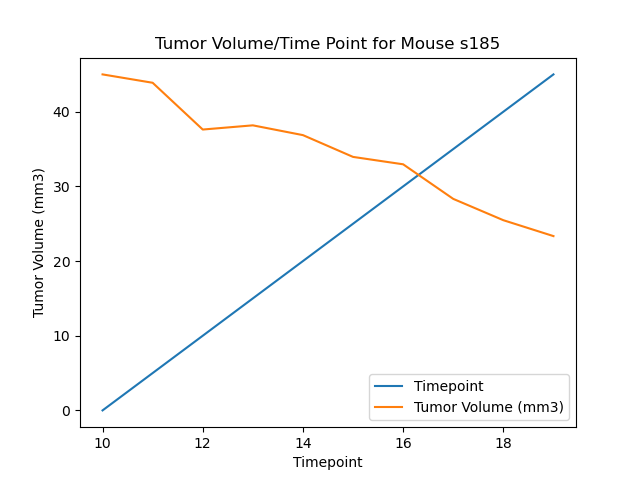

Text(0.5, 1.0, 'Tumor Volume/Time Point for Mouse s185')

In [38]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


lineplott = Combine_df[Combine_df["Mouse ID"].isin(["s185"])]
lineplott

Mouses185 = lineplott[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
Mouses185



Mouses185.plot.line()

plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume/Time Point for Mouse s185")



In [22]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
scatterplot_df = Combine_df.loc[Combine_df['Drug Regimen']== 'Capomulin']
tm=scatterplot_df.groupby(['Mouse ID']).mean()
plt.scatter(tm["Weight (g)"],tm["Tumor Volume (mm3)"])
plt.xlabel("Weight")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Avg Tumor Volume vs. Mouse Weight")
plt.show()




## Correlation and Regression

In [23]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


<IPython.core.display.Javascript object>


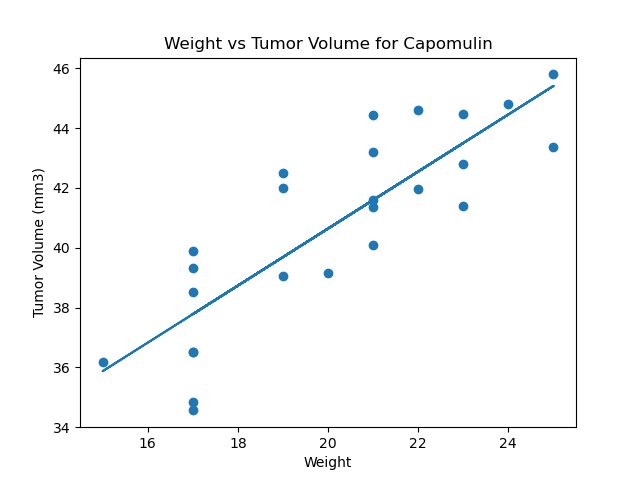

In [24]:
%matplotlib notebook
from scipy.stats import linregress

(slope, intercept,rvalue, pvalue, stderr)= linregress(tm["Weight (g)"],tm["Tumor Volume (mm3)"])
regress_values=tm["Weight (g)"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.scatter(tm["Weight (g)"],tm["Tumor Volume (mm3)"] )
plt.plot(tm["Weight (g)"], regress_values) #color='thistle')
plt.xlabel("Weight")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Weight vs Tumor Volume for Capomulin")
plt.show()
